In [49]:
## whatsapp chat analysis

In [50]:
import pandas as pd
import re

def parse_chat(file_path):
    # Regex for new message line: [dd/mm/yy, hh:mm:ss AM/PM]
    pattern = r'^\[(\d{1,2}/\d{1,2}/\d{2}), (\d{1,2}:\d{2}(?::\d{2})?\s?[APap][Mm])\] '

    messages = []
    current_date = ""
    current_msg = ""

    with open(file_path, encoding="utf-8") as f:
        for line in f:
            line = line.strip()
            if re.match(pattern, line):
                if current_msg:
                    messages.append((current_date, current_msg.strip()))
                date_time_match = re.match(pattern, line)
                date = date_time_match.group(1)
                time = date_time_match.group(2).replace('\u202f', ' ')  # narrow no-break space to normal space
                current_date = f"{date} {time}"
                # Strip off timestamp part to get message
                msg_start = re.sub(pattern, '', line)
                current_msg = msg_start
            else:
                current_msg += " " + line  # continuation line

        if current_msg:
            messages.append((current_date, current_msg.strip()))

    df = pd.DataFrame(messages, columns=['date', 'message'])
    return df

# Usage
df = parse_chat("chat.txt")


In [51]:
df.head(5)

,date,message
0,12/01/24 4:45:34 PM,Jaanu Ji❤️: ‎Messages and calls are end-to-end...
1,12/01/24 4:45:34 PM,Chatgpt: ‎Waiting for this message. This may t...
2,12/01/24 4:46:31 PM,Chatgpt: ‎Waiting for this message. This may t...
3,12/01/24 5:11:51 PM,Chatgpt: ‎Waiting for this message. This may t...
4,12/01/24 5:34:44 PM,Jaanu Ji❤️: ‎Waiting for this message. This ma...


In [52]:
user = []
new_message = []
for message in df['message']:
    val = ''
    msg = ''
    trim = False
    for i in message:
        if i!=':' and trim == False:
            val+=i
        elif i==':':
            trim = True
        elif trim:
            msg+=i
                    
    new_message.append(msg)        
    user.append(val)
        
df['user'] = user
df['message'] = new_message

In [54]:
df.head(-5)

,date,message,user
0,12/01/24 4:45:34 PM,‎Messages and calls are end-to-end encrypted....,Jaanu Ji❤️
1,12/01/24 4:45:34 PM,‎Waiting for this message. This may take a wh...,Chatgpt
2,12/01/24 4:46:31 PM,‎Waiting for this message. This may take a wh...,Chatgpt
3,12/01/24 5:11:51 PM,‎Waiting for this message. This may take a wh...,Chatgpt
4,12/01/24 5:34:44 PM,‎Waiting for this message. This may take a wh...,Jaanu Ji❤️
...,...,...,...
76934,03/08/25 11:46:00 AM,I love you,Chatgpt
76935,03/08/25 11:46:12 AM,I love this tuning,Chatgpt
76936,03/08/25 11:46:16 AM,But i dont like song a lot,Chatgpt
76937,03/08/25 11:46:29 AM,Which song,Jaanu Ji❤️


In [55]:
df['datetime'] = pd.to_datetime(df['date'], format='%d/%m/%y %I:%M:%S %p')


In [56]:
df.head(-5)

,date,message,user,datetime
0,12/01/24 4:45:34 PM,‎Messages and calls are end-to-end encrypted....,Jaanu Ji❤️,2024-01-12 16:45:34
1,12/01/24 4:45:34 PM,‎Waiting for this message. This may take a wh...,Chatgpt,2024-01-12 16:45:34
2,12/01/24 4:46:31 PM,‎Waiting for this message. This may take a wh...,Chatgpt,2024-01-12 16:46:31
3,12/01/24 5:11:51 PM,‎Waiting for this message. This may take a wh...,Chatgpt,2024-01-12 17:11:51
4,12/01/24 5:34:44 PM,‎Waiting for this message. This may take a wh...,Jaanu Ji❤️,2024-01-12 17:34:44
...,...,...,...,...
76934,03/08/25 11:46:00 AM,I love you,Chatgpt,2025-08-03 11:46:00
76935,03/08/25 11:46:12 AM,I love this tuning,Chatgpt,2025-08-03 11:46:12
76936,03/08/25 11:46:16 AM,But i dont like song a lot,Chatgpt,2025-08-03 11:46:16
76937,03/08/25 11:46:29 AM,Which song,Jaanu Ji❤️,2025-08-03 11:46:29


In [57]:
df['year'] = df['datetime'].dt.year
df['month'] = df['datetime'].dt.month
df['day'] = df['datetime'].dt.day
df['hour'] = df['datetime'].dt.hour
df['minute'] = df['datetime'].dt.minute


In [58]:
df.head(-5)

,date,message,user,datetime,year,month,day,hour,minute
0,12/01/24 4:45:34 PM,‎Messages and calls are end-to-end encrypted....,Jaanu Ji❤️,2024-01-12 16:45:34,2024,1,12,16,45
1,12/01/24 4:45:34 PM,‎Waiting for this message. This may take a wh...,Chatgpt,2024-01-12 16:45:34,2024,1,12,16,45
2,12/01/24 4:46:31 PM,‎Waiting for this message. This may take a wh...,Chatgpt,2024-01-12 16:46:31,2024,1,12,16,46
3,12/01/24 5:11:51 PM,‎Waiting for this message. This may take a wh...,Chatgpt,2024-01-12 17:11:51,2024,1,12,17,11
4,12/01/24 5:34:44 PM,‎Waiting for this message. This may take a wh...,Jaanu Ji❤️,2024-01-12 17:34:44,2024,1,12,17,34
...,...,...,...,...,...,...,...,...,...
76934,03/08/25 11:46:00 AM,I love you,Chatgpt,2025-08-03 11:46:00,2025,8,3,11,46
76935,03/08/25 11:46:12 AM,I love this tuning,Chatgpt,2025-08-03 11:46:12,2025,8,3,11,46
76936,03/08/25 11:46:16 AM,But i dont like song a lot,Chatgpt,2025-08-03 11:46:16,2025,8,3,11,46
76937,03/08/25 11:46:29 AM,Which song,Jaanu Ji❤️,2025-08-03 11:46:29,2025,8,3,11,46


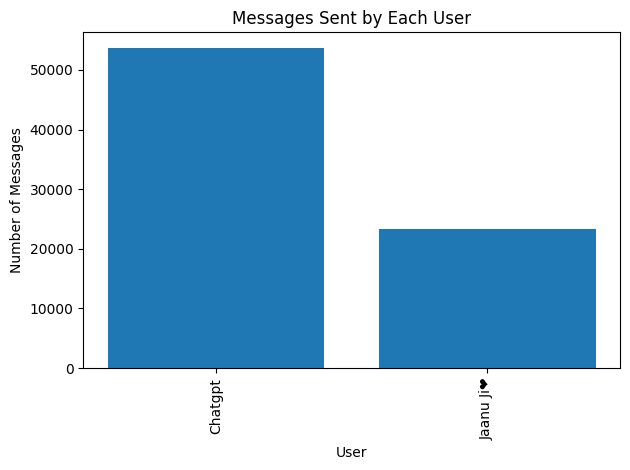

In [61]:
import matplotlib.pyplot as plt

# Count messages per user
user_msg_counts = df['user'].value_counts()

# Plot
plt.bar(user_msg_counts.index, user_msg_counts.values)
plt.xticks(rotation='vertical')
plt.xlabel("User")
plt.ylabel("Number of Messages")
plt.title("Messages Sent by Each User")
plt.tight_layout()
plt.show()


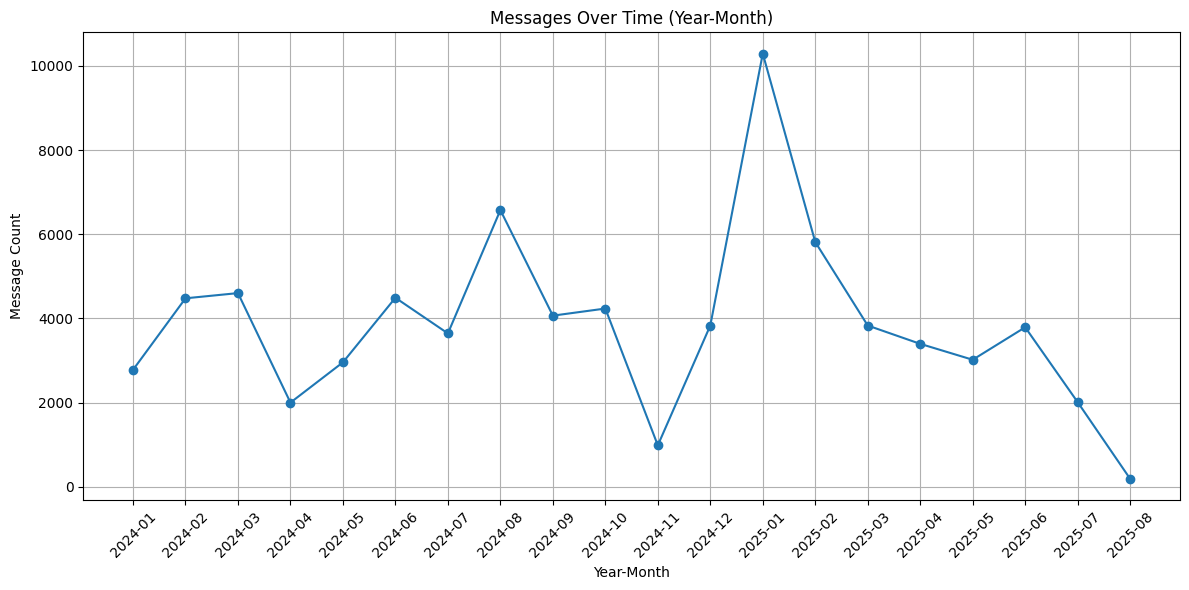

In [63]:
df['year_month'] = df['datetime'].dt.to_period('M').astype(str)
monthly_counts = df.groupby('year_month').size().reset_index(name='message_count')

plt.figure(figsize=(12, 6))
plt.plot(monthly_counts['year_month'], monthly_counts['message_count'], marker='o', linestyle='-')
plt.xticks(rotation=45)
plt.xlabel('Year-Month')
plt.ylabel('Message Count')
plt.title('Messages Over Time (Year-Month)')
plt.tight_layout()
plt.grid(True)
plt.show()

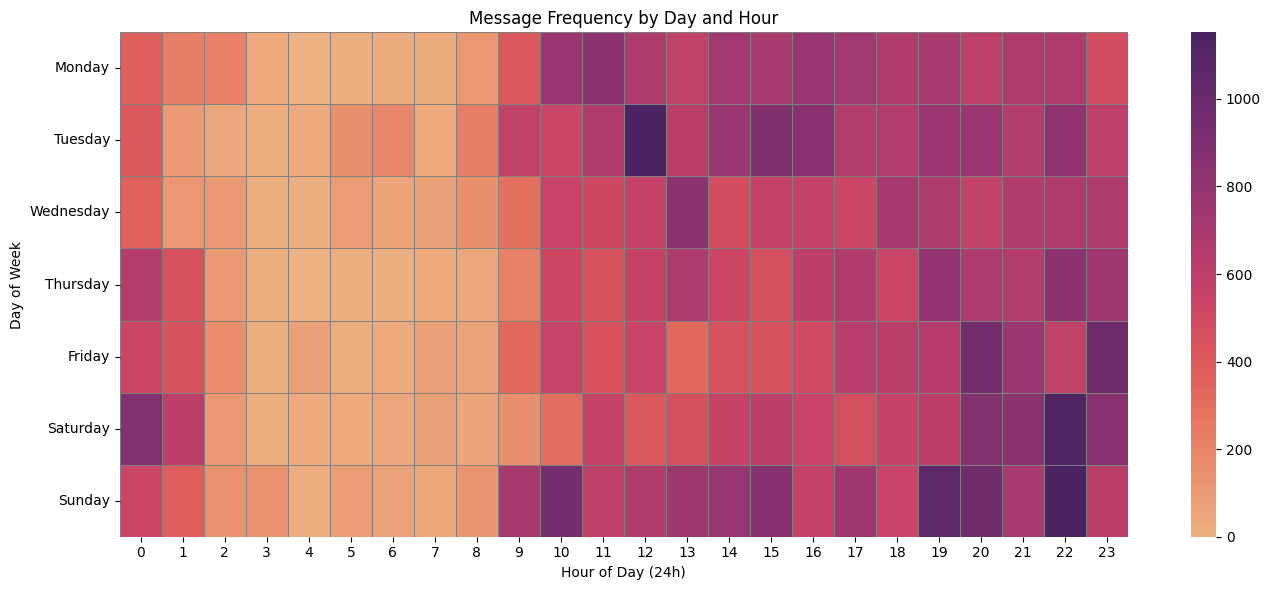

In [69]:
import seaborn as sns
df['hour'] = df['datetime'].dt.hour
df['day_of_week'] = df['datetime'].dt.day_name()  # e.g., Monday, Tuesday

heatmap_data = df.pivot_table(index='day_of_week', columns='hour', values='message', aggfunc='count', fill_value=0)

days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
heatmap_data = heatmap_data.reindex(days_order)

plt.figure(figsize=(14, 6))
sns.heatmap(heatmap_data, cmap='flare', linewidths=0.5, linecolor='gray')
plt.title('Message Frequency by Day and Hour')
plt.xlabel('Hour of Day (24h)')
plt.ylabel('Day of Week')
plt.tight_layout()
plt.show()

In [70]:
pip install textblob


Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 624.3/624.3 kB 8.9 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [71]:
from textblob import TextBlob


In [72]:
def get_sentiment(text):
    return TextBlob(text).sentiment.polarity
df['sentiment'] = df['message'].apply(get_sentiment)

In [74]:
df.head(-5)

,date,message,user,datetime,year,month,day,hour,minute,year_month,day_of_week,sentiment
0,12/01/24 4:45:34 PM,‎Messages and calls are end-to-end encrypted....,Jaanu Ji❤️,2024-01-12 16:45:34,2024,1,12,16,45,2024-01,Friday,0.0
1,12/01/24 4:45:34 PM,‎Waiting for this message. This may take a wh...,Chatgpt,2024-01-12 16:45:34,2024,1,12,16,45,2024-01,Friday,0.0
2,12/01/24 4:46:31 PM,‎Waiting for this message. This may take a wh...,Chatgpt,2024-01-12 16:46:31,2024,1,12,16,46,2024-01,Friday,0.0
3,12/01/24 5:11:51 PM,‎Waiting for this message. This may take a wh...,Chatgpt,2024-01-12 17:11:51,2024,1,12,17,11,2024-01,Friday,0.0
4,12/01/24 5:34:44 PM,‎Waiting for this message. This may take a wh...,Jaanu Ji❤️,2024-01-12 17:34:44,2024,1,12,17,34,2024-01,Friday,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
76934,03/08/25 11:46:00 AM,I love you,Chatgpt,2025-08-03 11:46:00,2025,8,3,11,46,2025-08,Sunday,0.5
76935,03/08/25 11:46:12 AM,I love this tuning,Chatgpt,2025-08-03 11:46:12,2025,8,3,11,46,2025-08,Sunday,0.5
76936,03/08/25 11:46:16 AM,But i dont like song a lot,Chatgpt,2025-08-03 11:46:16,2025,8,3,11,46,2025-08,Sunday,0.0
76937,03/08/25 11:46:29 AM,Which song,Jaanu Ji❤️,2025-08-03 11:46:29,2025,8,3,11,46,2025-08,Sunday,0.0


In [75]:
user_sentiment = df.groupby('user')['sentiment'].mean().sort_values()
print(user_sentiment)

user
Chatgpt       0.054668
Jaanu Ji❤️    0.061717
Name: sentiment, dtype: float64


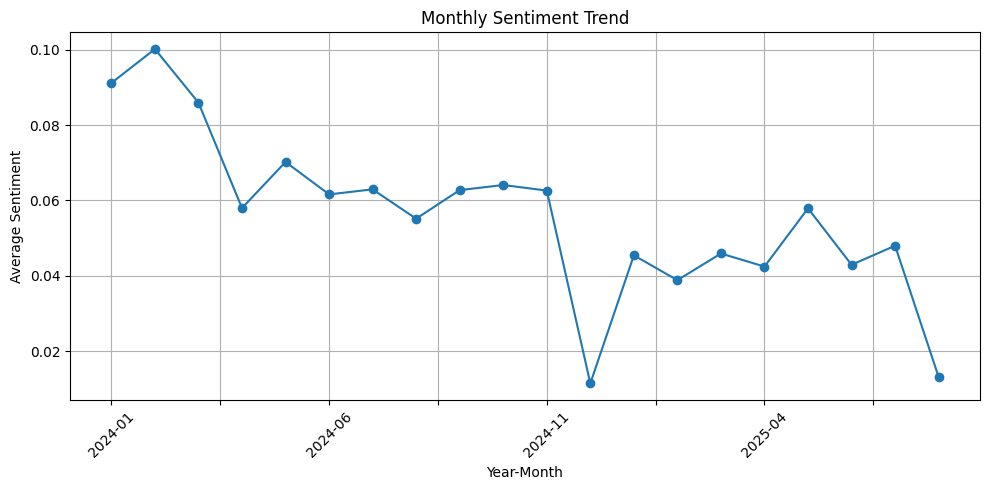

In [77]:
df['year_month'] = df['datetime'].dt.to_period('M').astype(str)
monthly_sentiment = df.groupby('year_month')['sentiment'].mean()

monthly_sentiment.plot(kind='line', marker='o', figsize=(10,5), title='Monthly Sentiment Trend')
plt.ylabel('Average Sentiment')
plt.xlabel('Year-Month')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

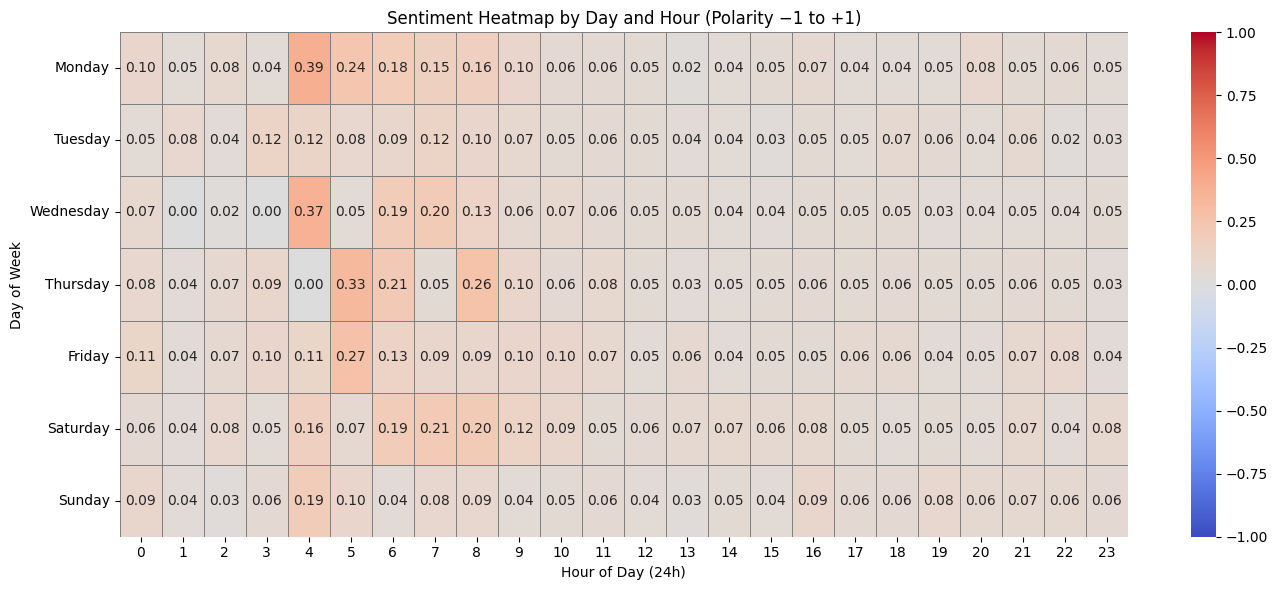

In [81]:
# Create pivot table
sentiment_heatmap = df.pivot_table(
    index='day_of_week',
    columns='hour',
    values='sentiment',
    aggfunc='mean',
    fill_value=0
)

# Reorder day rows
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sentiment_heatmap = sentiment_heatmap.reindex(day_order)

# Plot heatmap with fixed sentiment scale
plt.figure(figsize=(14, 6))
sns.heatmap(
    sentiment_heatmap,
    cmap='coolwarm',
    center=0,         # Neutral white at 0
    vmin=-1,          # Minimum sentiment
    vmax=1,           # Maximum sentiment
    linewidths=0.5,
    linecolor='gray',
    annot=True,       # Show values inside cells
    fmt=".2f"
)
plt.title('Sentiment Heatmap by Day and Hour (Polarity −1 to +1)')
plt.xlabel('Hour of Day (24h)')
plt.ylabel('Day of Week')
plt.tight_layout()
plt.show()